# **Intelligent Churn Prediction and Recommendation System**

# **📌STEP 1 — Dataset**

### ***1️⃣ Introduction***
### Customer Churn Prediction
This notebook presents a complete end-to-end ML  project aimed at
predicting customer churn and recommending personalized offers for a telecom
agency similar to Orange.

The notebook includes:
- Data loading and exploration
- Data preprocessing
- Churn prediction modeling
- Recommendation system logic



### ***2️⃣ Import Libraries and  Load Dataset***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
#df = pd.read_csv("Customer-Churn.csv", delimiter="\t")
df = pd.read_csv(r"C:\Users\pc\Desktop\PFA\PFA\Customer-Churn.csv", delimiter="\t")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
import os

file_path = r"C:\Users\pc\Desktop\PFA\PFA\Customer-Churn.csv"

if os.path.isfile(file_path):
    print("File found! Reading data...")
    df = pd.read_csv(file_path, delimiter="\t")
    print(df.head())
else:
    print("❌ File not found! Please check the path and filename.")


File found! Reading data...
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streamin

### ***3️⃣Dataset Overview***

In [4]:
df.shape


(7043, 21)

In [5]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Each row represents a customer.
### The target variable is **Churn**.


### ***4️⃣ Target Variable Analysis***

In [8]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df['Churn'].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

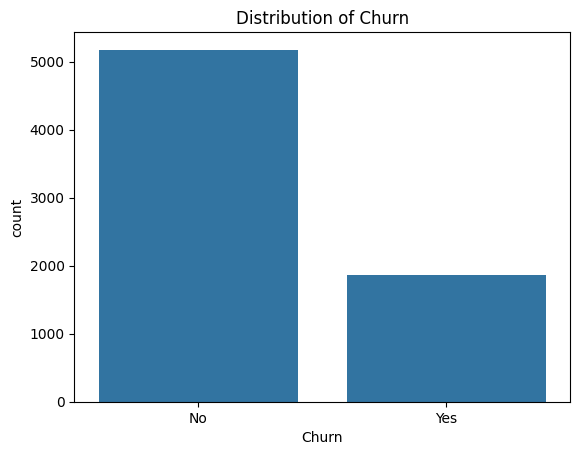

In [10]:
sns.countplot(x='Churn', data=df)
plt.title("Distribution of Churn")
plt.show()


# **📌STEP 2 — Data Cleaning & Preparation**

In this step, we clean the dataset to make it ready for Machine Learning. 
We will:
1. Drop unnecessary columns
2. Encode categorical features
3. Handle missing values
4. Scale numerical features

### ***1️⃣ Drop unnecessary columns***

In [11]:
# Drop columns that are not useful for prediction
# 'customerID' is just an identifier and doesn't help the model
df.drop(['customerID'], axis=1, inplace=True)


### ***2️⃣ Encode categorical variables***

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
#  Encode categorical variables
# ===============================================
# Binary columns (Yes/No)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

# Multi-category columns → One-hot encoding
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaymentMethod', 'gender']  # gender included for one-hot

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [14]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0,1,0,1,0,1,29.85,29.85,0,True,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,34,1,0,56.95,1889.5,0,False,...,False,False,False,False,True,False,False,False,True,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,False,False,False,False,False,False,False,False,True,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,False,True,False,False,False,False,True
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,True,False,False


### ***3️⃣ Handle missing values***

In [15]:
print("Missing values for TotalCharges :",df['TotalCharges'].isnull().sum())

Missing values for TotalCharges : 0


In [16]:
# Convert TotalCharges to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
# Fill missing TotalCharges with median 
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_15160\2481427375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [18]:
print("Missing after filling:", df['TotalCharges'].isnull().sum())


Missing after filling: 0


In [19]:
# chek  missing values for all columns

df.isnull().sum()


SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

### ***4️⃣ Scale numerical features***

In [20]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [21]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,True,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,False,...,False,False,False,False,True,False,False,False,True,True
2,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,False,...,False,False,False,False,False,False,False,False,True,True
3,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,True,...,False,False,False,False,True,False,False,False,False,True
4,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,False,...,False,False,False,False,False,False,False,True,False,False


### scale Numerical Features
### - StandardScaler is used to normalize numerical features.


### ***5️⃣ Split dataset into train/test***

In [22]:
# Features and target

X = df.drop('Churn', axis=1)
y = df['Churn']

# 80/20 train-test split, stratified to keep Churn ratio

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data cleaning and preparation completed!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

✅ Data cleaning and preparation completed!
X_train shape: (5634, 30)
X_test shape: (1409, 30)


# **📌STEP 3 — Churn Prediction Models**

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score


### ***1️⃣Split dataset into train/test***

In [24]:
# Features and target

X = df.drop('Churn', axis=1)
y = df['Churn']

# 80/20 train-test split, stratified to keep Churn ratio

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### ***2️⃣ Train Logistic Regression***

In [25]:
# Initialize the model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model on training data
logreg.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

### ***3️⃣ Make predictions***

In [26]:
# Predict class labels on the test set
y_pred_logreg = logreg.predict(X_test)

# Predict churn probabilities (useful for recommendation logic)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]  # Probability of class '1' (Churn)


### ***4️⃣ Evaluate model performance***

In [27]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)

# Recall (important for detecting churners)
recall = recall_score(y_test, y_pred_logreg)

# F1-score (balance between precision and recall)
f1 = f1_score(y_test, y_pred_logreg)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob_logreg)

# Print metrics
print("=== Logistic Regression Performance ===")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")


=== Logistic Regression Performance ===
Accuracy: 0.739
Recall: 0.783
F1-score: 0.614
ROC AUC: 0.842


### ***5️⃣ Confusion Matrix***

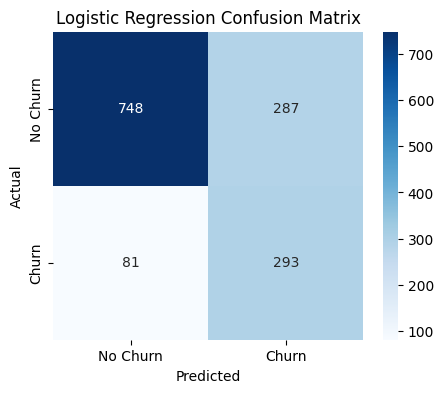

In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


### ***ROC Curve Visualization***

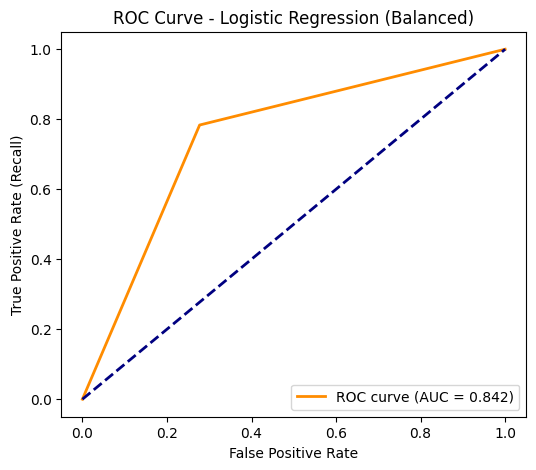

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities of positive class (Churn = 1)
y_prob = y_pred_logreg

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression (Balanced)")
plt.legend(loc="lower right")
plt.show()


# 🔹Random Forest Model

### ***1️⃣ Train Random Forest***

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  
)

# Train the model
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

### ***2️⃣ Predictions & Probabilities***

In [31]:
# Predict classes
y_pred_rf = rf.predict(X_test)

# Predict probabilities
y_prob_rf = rf.predict_proba(X_test)[:, 1]


### ***3️⃣ Model Evaluation (Metrics)***

In [32]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

acc_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("=== Random Forest Performance ===")
print(f"Accuracy: {acc_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-score: {f1_rf:.3f}")
print(f"ROC AUC: {roc_rf:.3f}")


=== Random Forest Performance ===
Accuracy: 0.786
Recall: 0.505
F1-score: 0.557
ROC AUC: 0.819


### ***4️⃣ Confusion Matrix Visualization***

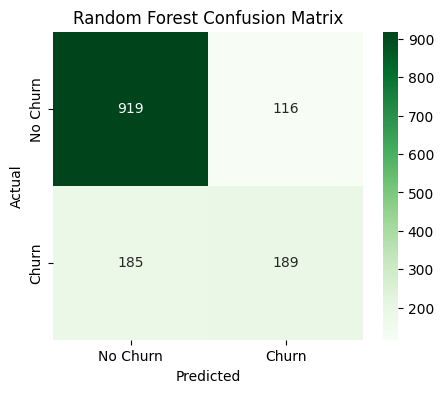

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['No Churn','Churn'],
    yticklabels=['No Churn','Churn']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


### ***5️⃣ ROC Curve (Random Forest)***

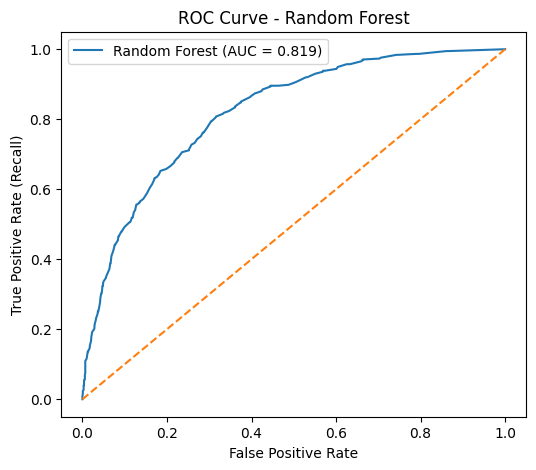

In [34]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_rf:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


# 🔹 KNN Model — K-Nearest Neighbors

### ***1️⃣ Feature Scaling***

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### ***2️⃣ Train KNN Model***

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### ***3️⃣ Predictions***

In [37]:
# Class prediction (Yes / No)
y_pred_knn = knn.predict(X_test_scaled)

# Probabilities (for ROC AUC)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]


### ***4️⃣ Evaluation Metrics***

In [38]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_prob_knn)

print("=== KNN Performance ===")
print(f"Accuracy: {accuracy_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"F1-score: {f1_knn:.3f}")
print(f"ROC AUC: {roc_knn:.3f}")


=== KNN Performance ===
Accuracy: 0.747
Recall: 0.500
F1-score: 0.512
ROC AUC: 0.772


### ***5️⃣ Confusion Matrix***

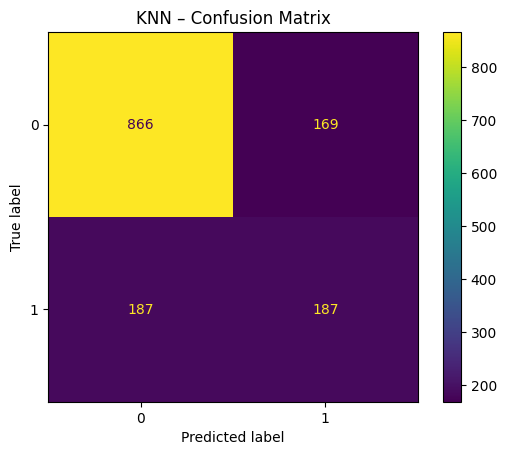

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title("KNN – Confusion Matrix")
plt.show()


### ***6️⃣ ROC Curve***

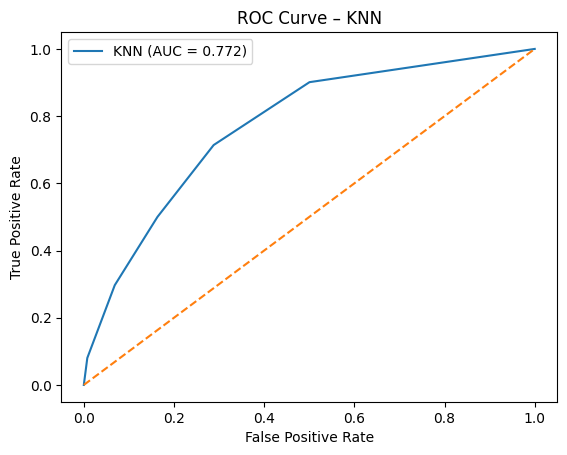

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob_knn)

plt.figure()
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_knn:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend()
plt.show()


# 🌳 Decision Tree — Churn Prediction Model

### ***1️⃣ Train Decision Tree Model***

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=10   # for skip overfitting
)

dt.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

### ***2️⃣ Predictions***

In [42]:
# Class prediction
y_pred_dt = dt.predict(X_test)

# Probabilities for ROC AUC
y_prob_dt = dt.predict_proba(X_test)[:, 1]


### ***3️⃣ Evaluation Metrics***

In [43]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_prob_dt)

print("=== Decision Tree Performance ===")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-score: {f1_dt:.3f}")
print(f"ROC AUC: {roc_dt:.3f}")


=== Decision Tree Performance ===
Accuracy: 0.757
Recall: 0.559
F1-score: 0.550
ROC AUC: 0.762


### ***4️⃣ Confusion Matrix***

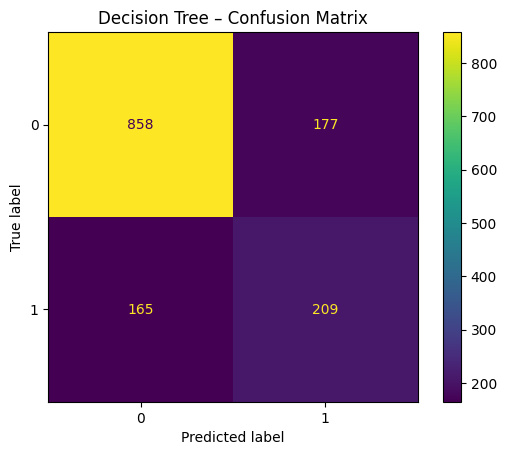

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.title("Decision Tree – Confusion Matrix")
plt.show()


### ***5️⃣ ROC Curve***

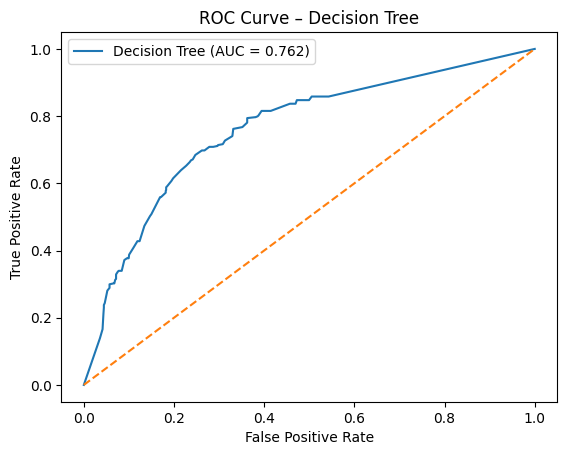

In [45]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_dt:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.show()


# Comparison Plot:Which model is best for churn detection at Orange?📊


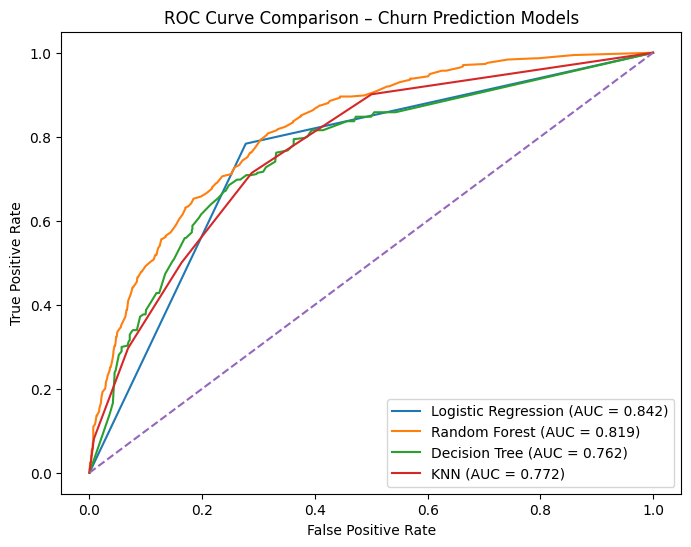

In [46]:

plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_rf:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_dt:.3f})")
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_knn:.3f})")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Churn Prediction Models")
plt.legend()
plt.show()


# 📊 Comparison of Model Evaluation

### Model Evaluation Comparison

| Model | Accuracy | Recall | F1-score | ROC AUC |
|------|----------|--------|----------|---------|
| Logistic Regression (Balanced) | 0.739 | **0.783** | **0.614** | **0.842** |
| Random Forest | **0.786** | 0.505 | 0.557 | 0.819 |
| Decision Tree | 0.757 | 0.559 | 0.550 | 0.762 |
| KNN | 0.747 | 0.500 | 0.512 | 0.772 |



# 🔹Final Model Choice📌

# Logistic Regression was selected due to its high recall and strong ROC AUC, making it the most suitable model for churn prediction in Orange's customer 

# retention strategy.
# ✔️ Chosen Model: Logistic Regression
# ✔️ Metric Optimized: Recall
# ✔️ Use Case: Identify high-risk customers and trigger retention offers

In [47]:
###########################################################################################################################################################

# **🔥 STEP 4 — Recommendation System**

# STEP 4 — Recommendation System

## Goal
The goal of this step is to **propose personalized retention offers** for customers identified as high churn risk.  
We use a **Content-Based Recommendation** approach because it relies on the features of the customer and does not require large historical data from all customers.

## Dataset
We create a dataset with the following columns:

- MonthlyCharges: Monthly subscription cost
- InternetUsage: Data usage per month
- CallsUsage: Call usage per month
- ServiceType: Type of service (DSL, Fiber, etc.)
- OfferChosen: Offer previously selected by the customer

> This dataset can be synthetic but realistic to simulate the behavior of customers.


In [48]:
import pandas as pd
import numpy as np

# Clone from your churn df
rec_df = df[['MonthlyCharges']].copy()

# Add numeric usage columns (simulate realistic values)
# ex InternetUsage (GB per month) و CallsUsage (minutes per month)
np.random.seed(42)  

rec_df['InternetUsage'] = np.random.randint(5, 100, size=len(rec_df))   # 5-100 GB
rec_df['CallsUsage'] = np.random.randint(50, 500, size=len(rec_df))    # 50-500 min

# Add OfferChosen column (simulate offers)
offers = ['Internet 10GB', 'Internet 20GB', 'Internet 30GB', 'Internet 50GB', 'Internet Unlimited']
rec_df['OfferChosen'] = np.random.choice(offers, size=len(rec_df))

# Preview
rec_df.head()


,MonthlyCharges,InternetUsage,CallsUsage,OfferChosen
0,-1.160323,56,245,Internet 10GB
1,-0.259629,97,372,Internet 50GB
2,-0.362660,19,120,Internet 50GB
3,-0.746535,76,297,Internet 30GB
4,0.197365,65,195,Internet Unlimited


In [49]:
# Step 1: select features
features = ['MonthlyCharges','InternetUsage','CallsUsage']
X_rec = rec_df[features]

# Step 2: scale features
from sklearn.preprocessing import StandardScaler
scaler_rec = StandardScaler()
X_rec_scaled = scaler_rec.fit_transform(X_rec)

# Step 3: cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(X_rec_scaled)

# Step 4: define recommendation function
def recommend_offer(customer_index, similarity_matrix, df, top_n=5):
    similar_indices = similarity_matrix[customer_index].argsort()[::-1][1:top_n+1]
    recommended_offer = df.iloc[similar_indices]['OfferChosen'].value_counts().idxmax()
    return recommended_offer

# Example for customer #0
offer = recommend_offer(0, similarity_matrix, rec_df)
print("Recommended Offer:", offer)


Recommended Offer: Internet 50GB


# **🔹 STEP 5 — Smart Churn + Recommendation Logic**

## Goal
The goal of this step is to **combine the Churn Prediction model with the Recommendation System** to provide actionable insights for the telecom agency.

- **High-risk customers** (churn probability > threshold) will receive a **personalized retention offer**.
- **Low-risk customers** will not receive a special offer (Standard Offer).

This step is the core of the intelligent logic of our project.


### ***1️⃣ Get churn probabilities from the best model***

In [50]:

churn_probs = logreg.predict_proba(X_test)[:,1]  # probability of churn (Yes)


## 
- `predict_proba()` returns two columns: [No churn, Yes churn]  
- We take `[:,1]` to get the **probability of Churn (Yes)** for each customer  
- This probability will be used to decide whether to recommend an offer.


### ***2️⃣ Define threshold***

In [51]:
threshold = 0.6  # customers with churn probability > 0.6 are high-risk


## 
- The threshold is **adjustable** based on business policy  
- A higher threshold → fewer customers targeted, but more accurate  
- A lower threshold → more customers targeted, higher retention cost


### ***3️⃣ Combine Churn + Recommendation***

In [52]:
customer_index = 0  # example: first customer in test set

# Churn probability
prob = churn_probs[customer_index]

# Recommendation logic
if prob > threshold:
    offer = recommend_offer(customer_index, similarity_matrix, rec_df)
else:
    offer = "Standard Offer"

print(f"Churn Probability: {prob:.2f}")
print(f"Recommended Offer: {offer}")


Churn Probability: 0.12
Recommended Offer: Standard Offer


## 
- If a customer is **high-risk**, the system recommends the **most suitable retention offer** based on similar customers.  
- If a customer is **low-risk**, no special offer is recommended.  



### ***4️⃣ Loop over multiple customers***

In [53]:
results = []

for i in range(len(X_test)):
    prob = churn_probs[i]
    if prob > threshold:
        offer = recommend_offer(i, similarity_matrix, rec_df)
    else:
        offer = "Standard Offer"
    results.append({
        "CustomerIndex": i,
        "Churn_Probability": prob,
        "Recommended_Offer": offer
    })

results_df = pd.DataFrame(results)
results_df.head()


,CustomerIndex,Churn_Probability,Recommended_Offer
0,0,0.116407,Standard Offer
1,1,0.851495,Internet 10GB
2,2,0.148974,Standard Offer
3,3,0.657972,Internet 50GB
4,4,0.060442,Standard Offer


## 
- We generate a **table for all customers** in the test set  
- Columns:
  - CustomerIndex → index of the customer  
  - Churn_Probability → probability of leaving  
  - Recommended_Offer → retention offer if high-risk, else Standard Offer  
- This table can be directly used in a **Web App** for staff to see results.


In [54]:
import joblib

# Save Logistic Regression model and scaler
joblib.dump(logreg, 'logreg_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model and scaler saved!")

✅ Model and scaler saved!
